# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# test_city = 'chokurdakh'
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q='
#     response = requests.get(city_url + test_city ).json()
# print(json.dumps(response, indent = 4, sort_keys = True))
   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
   # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city ).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | angren
Processing Record 5 of Set 1 | rongcheng
Processing Record 6 of Set 1 | sotnikovo
Processing Record 7 of Set 1 | carlsbad
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | miraflores
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | yumen
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | seoul
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | itupiranga
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | san matias
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | fiche
Processing Record 23 of Set 1 | saleaula
C

In [23]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,-0.91,97,100,9.39,GL,1670106070
1,punta arenas,-53.1500,-70.9167,10.06,46,20,11.83,CL,1670106484
2,quelimane,-17.8786,36.8883,25.97,73,20,2.57,MZ,1670106078
3,ushuaia,-54.8000,-68.3000,6.81,65,75,8.75,AR,1670105897
4,villa union,23.2000,-106.2333,28.98,45,0,2.57,MX,1670106586


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,-0.91,97,100,9.39,GL,1670106070
1,punta arenas,-53.1500,-70.9167,10.06,46,20,11.83,CL,1670106484
2,quelimane,-17.8786,36.8883,25.97,73,20,2.57,MZ,1670106078
3,ushuaia,-54.8000,-68.3000,6.81,65,75,8.75,AR,1670105897
4,villa union,23.2000,-106.2333,28.98,45,0,2.57,MX,1670106586


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

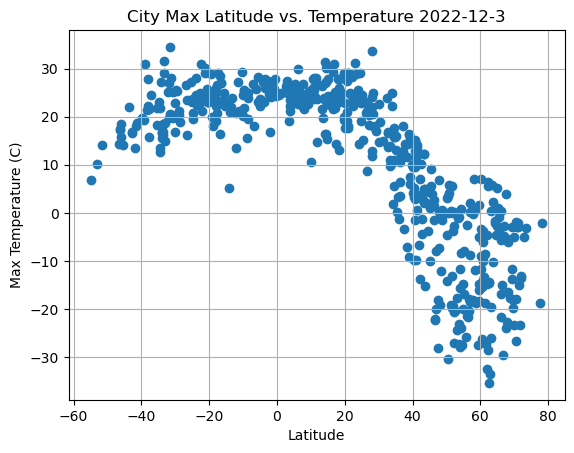

In [27]:
# Build scatter plot for latitude vs. temperature
x_series = city_data_df['Lat']
y_series = city_data_df['Max Temp']
plt.scatter(x_series, y_series, marker='o')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature 2022-12-3')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

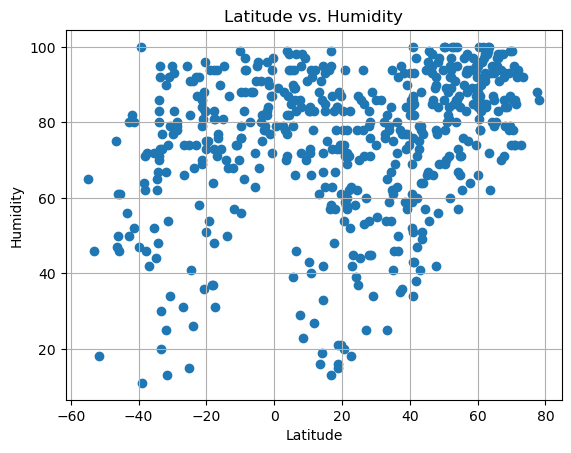

In [29]:
# Configure the map plot_1
x_series = city_data_df['Lat']
y_series = city_data_df['Humidity']
plt.scatter(x_series, y_series, marker='o')
# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

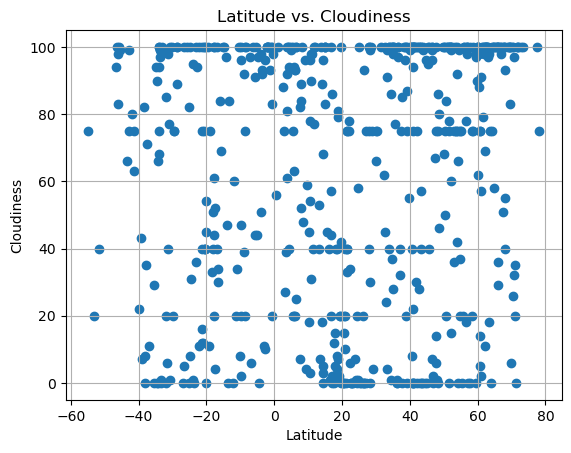

In [30]:
x_series = city_data_df['Lat']
y_series = city_data_df['Cloudiness']
plt.scatter(x_series, y_series, marker='o')
# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

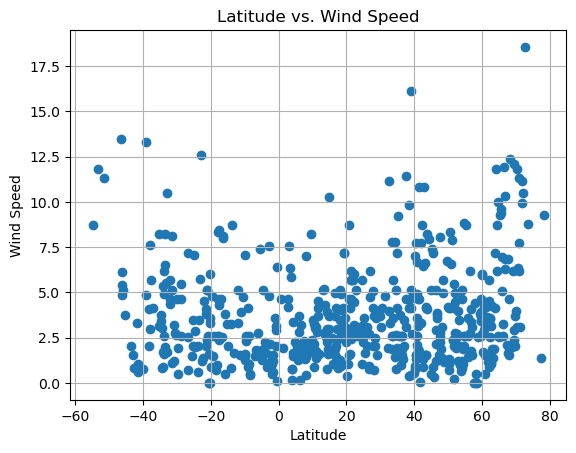

In [31]:
x_series = city_data_df['Lat']
y_series = city_data_df['Wind Speed']
plt.scatter(x_series, y_series, marker='o')
# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,10.06,46,20,11.83,CL,1670106484
2,quelimane,-17.8786,36.8883,25.97,73,20,2.57,MZ,1670106078
3,ushuaia,-54.8000,-68.3000,6.81,65,75,8.75,AR,1670105897
8,cape town,-33.9258,18.4232,16.86,70,68,4.92,ZA,1670106003
9,tarata,-17.6167,-66.0167,20.68,48,44,4.30,BO,1670106586


The r-value is: -0.8430795443447432


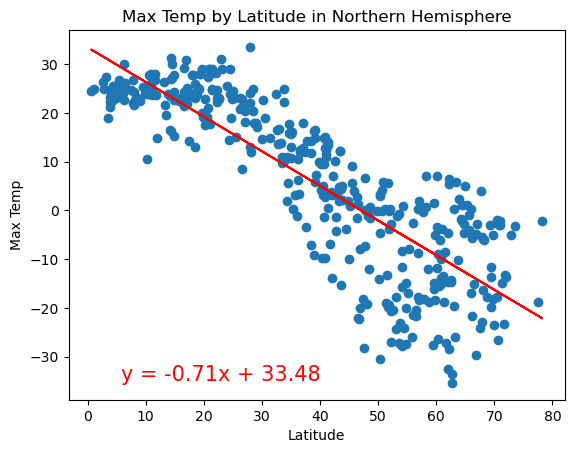

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,-0.91,97,100,9.39,GL,1670106070
4,villa union,23.2000,-106.2333,28.98,45,0,2.57,MX,1670106586
5,tuktoyaktuk,69.4541,-133.0374,-11.63,87,100,12.12,CA,1670106038
6,bethel,41.3712,-73.4140,13.44,82,100,1.79,US,1670106086
7,longyearbyen,78.2186,15.6401,-2.09,86,75,9.26,SJ,1670106035


In [34]:
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_vales = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(north_x, north_y)
plt.plot(north_x, regress_vales, color= 'r')
plt.annotate(line_eq, (5.8, -35), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp by Latitude in Northern Hemisphere')
plt.show()
northern_hemi_df.head()

The r-value is: 0.44581882119494287


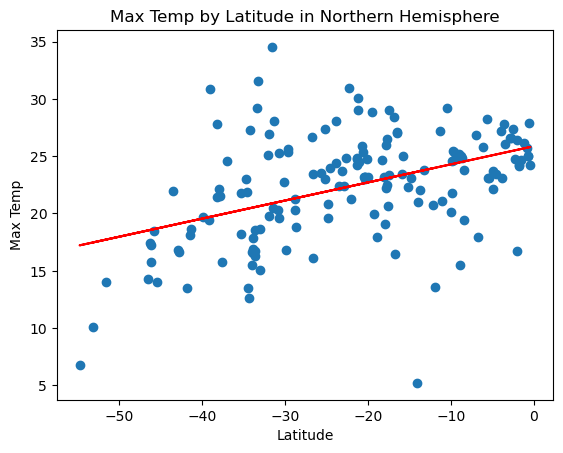

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,10.06,46,20,11.83,CL,1670106484
2,quelimane,-17.8786,36.8883,25.97,73,20,2.57,MZ,1670106078
3,ushuaia,-54.8000,-68.3000,6.81,65,75,8.75,AR,1670105897
8,cape town,-33.9258,18.4232,16.86,70,68,4.92,ZA,1670106003
9,tarata,-17.6167,-66.0167,20.68,48,44,4.30,BO,1670106586


In [37]:
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_vales = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')
plt.scatter(south_x, south_y)
plt.plot(south_x, regress_vales, color= 'r')
plt.annotate(line_eq, (5.8, -50), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp by Latitude in Southern Hemisphere')
plt.show()
# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

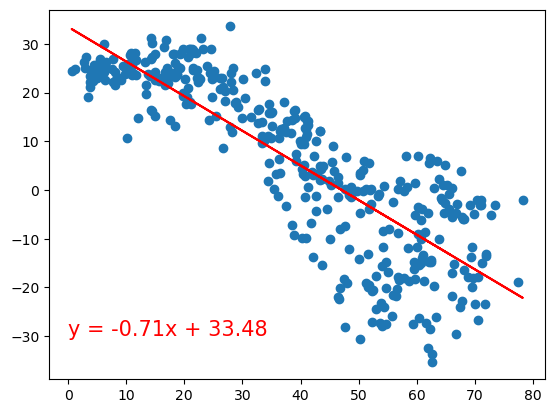

The r-value is: -0.8430795443447432


In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude in Northern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

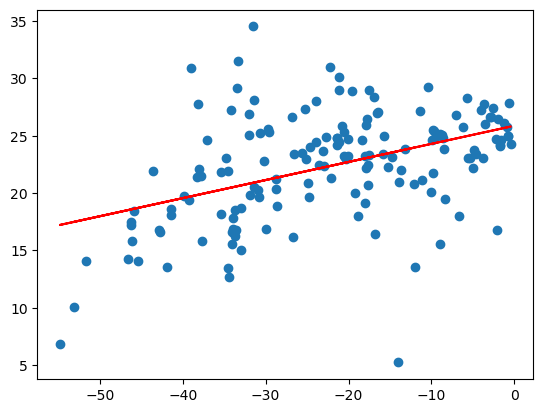

The r-value is: 0.44581882119494287


In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp by Latitude in Southern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

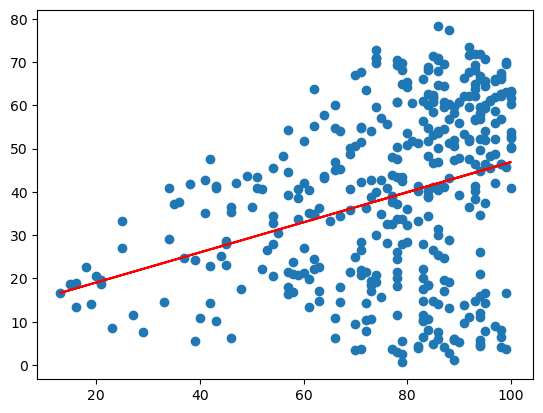

The r-value is: 0.32700727092604753


In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Northern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

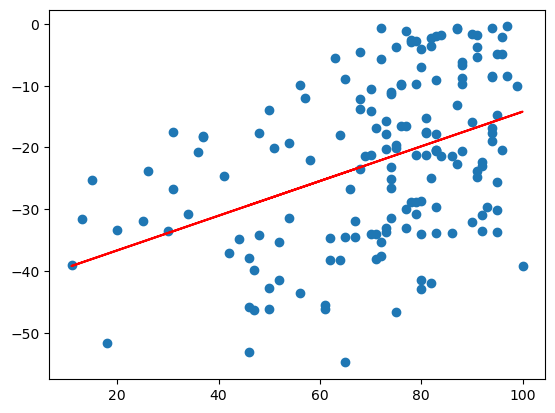

The r-value is: 0.41728581701475614


In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in Southern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

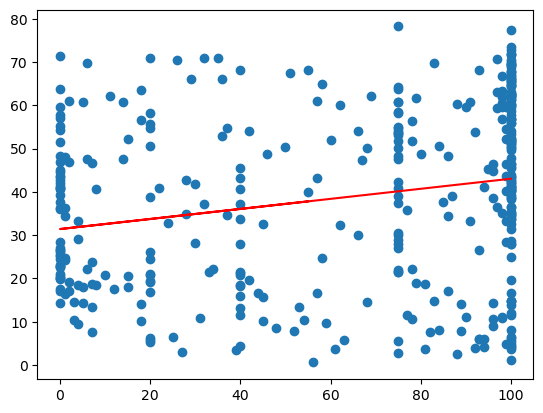

The r-value is: 0.2226078890048822


In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude in Northern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

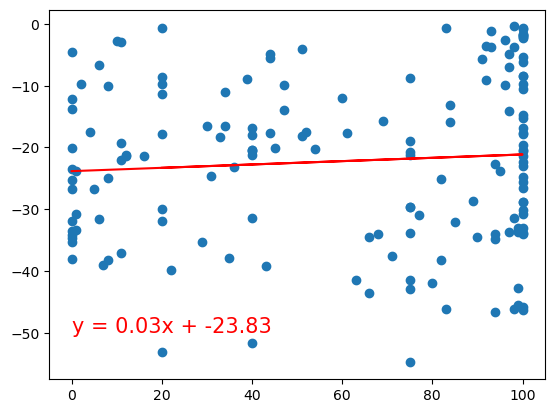

The r-value is: 0.07625590632368524


In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in Southern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

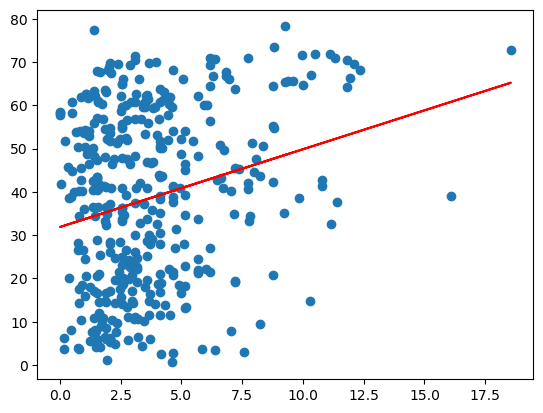

The r-value is: 0.24557571762864358


In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude in Northern Hemisphere Linear Regression')
plt.show()

print(f"The r-value is: {rvalue}")

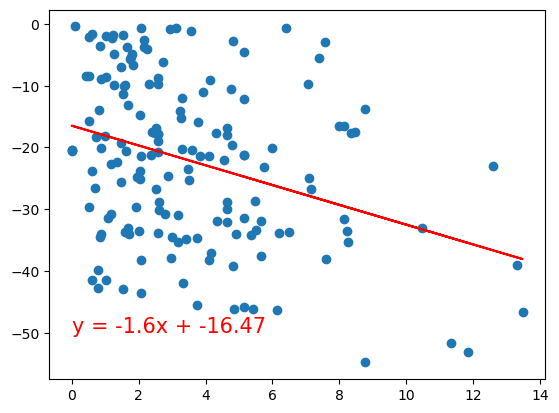

The r-value is: -0.3312829999853508


In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE